<h1> <b>ML Regression Model

> > <h3> Predicting propery tax assessed values of Single Family Properties

<h2>Project Goal:
    Find the key drivers of property value for single family properties

<h3>Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import env
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy import stats

from math import sqrt

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

directory = os.getcwd()

# imports for modeling:
# import Logistic regression
from sklearn.linear_model import LogisticRegression
# import K Nearest neighbors:
from sklearn.neighbors import KNeighborsClassifier
# import Decision Trees:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
# import Random Forest:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

# interpreting our models:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#feature selection
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<h1><b>Acquiring the Data

> > Data was acquired from the Codeup database
> > I used the get_zillow_data() function from my wrangle.py file.\
> > Scope of the data:
> > > - 56,080 Rows
> > > - 4 Columns: bedrooms, bathrooms, total_sqft, home_value

In [2]:
from wrangle import SQL_query, get_zillow_data
df = get_zillow_data(SQL_query, directory, filename = 'zillow.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56080 entries, 0 to 56079
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    56080 non-null  float64
 1   bathrooms   56080 non-null  float64
 2   total_sqft  55849 non-null  float64
 3   home_value  56072 non-null  float64
 4   county      56080 non-null  float64
dtypes: float64(5)
memory usage: 2.1 MB


<h1><b>Preparing the Data

In [3]:
from wrangle import prepare
df = prepare(df)

> <h4>The dataset had 239 null values removed; an insignificant amount that will not harm the exploration and modeling

> <h4>The data also had instances with extremly high values (outliers) that would skew the dataset, so I removed all home values larger than $1M.

> <h4>The column data in 'county' was changed from numeric data to text for easier reference

<h1><b>Exploratory Data Analysis - Zillow

<h3>Initial Hypothesis

 > <h4>With only three variables to look at in regards to the goal of predicting, I predict three things:

 > > <h4/>'Total Sqft' will have the largest impact on the target 'home value.
 > > <h4/>'Bedrooms' will have some impact on the target, but noticeably less than 'Total_Sqft'. Not a great variable to use by itself for prediction.
    
 > > <h4/>'Bathrooms' will have the least impact on the target due to bathrooms having the smallest amount of square footage in a home, reducing impact on home value.

<h3>Distributions

> <b>Univariate Distributions<b/>

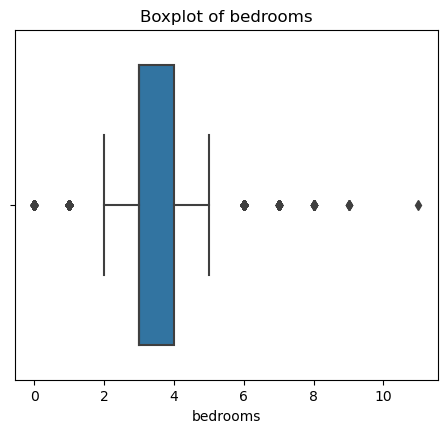

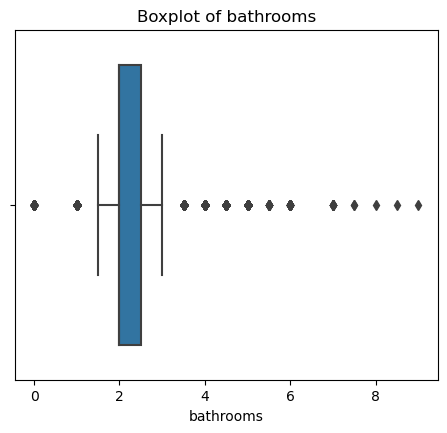

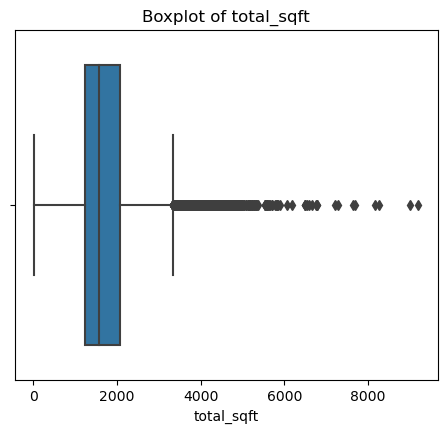

In [4]:
from wrangle import boxplot
boxplot(df)

> <b>Univariate Exploring Takeaways
    > - The distribution for all features presents with a right skew, which means that the mean is to the right of the median
    > - The boxplots were used to get a look at the outliers.
    > - Overall, nothing special here, but the distribution type will be important for future statistic testing<b/>

<h2>Splitting the data<b/>

In [5]:
from wrangle import split_zillow_data
train, validate, test = split_zillow_data(df)

In [6]:
#Let's split up the train data between X and y
from wrangle import XandY
X_train, y_train, X_validate, y_validate, X_test, y_test = XandY(train, validate, test)

<h2><b>Multi-variate Data Exploration (train dataset only)<b/>

> <h3><b>Heatmap<b/>

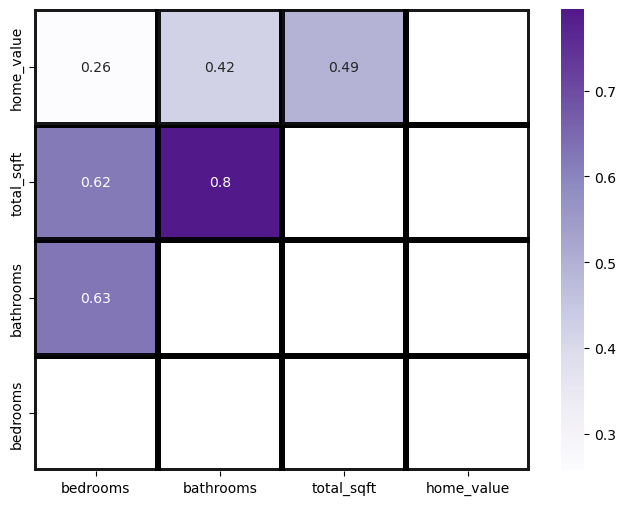

In [7]:
from wrangle import heatmap
heatmap(train)

> <b>Heatmap takeaways:<b/>
    > - I'm seeing the strongest correlation between home value in the following order:
    > > 1. total square feet (0.49)
    > > 2. bathrooms (0.42)
    > > 3. bedrooms (0.26)
    > - Interesting fact: Total square feet and bathrooms have the strongest correlation in the heatmap.

> <h3><b>Scatterplot Viz<b/>

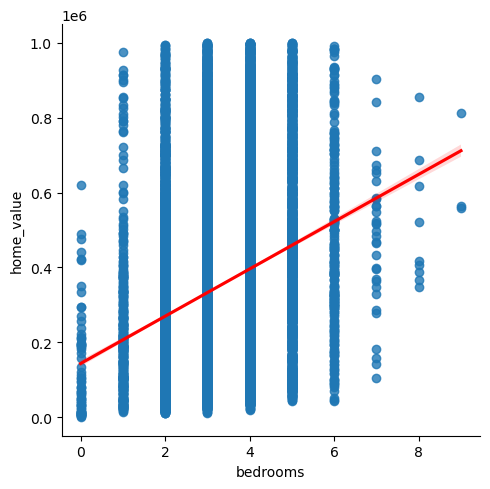

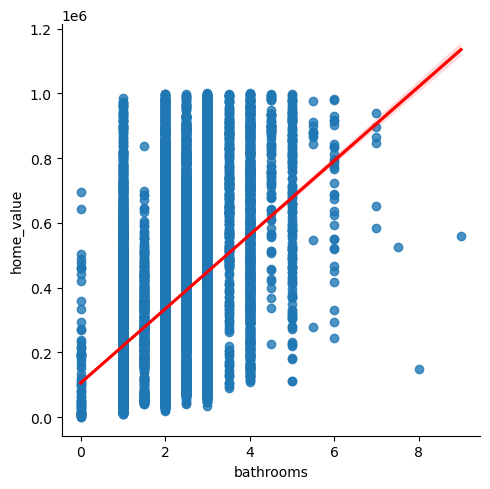

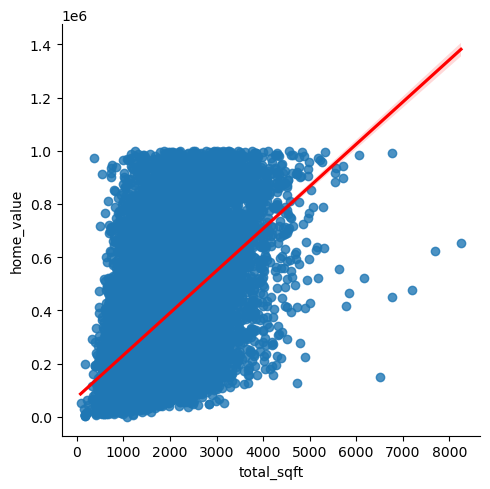

In [8]:
from wrangle import scatterplots
scatterplots(train)

> <b>Scatterplot takeaway:<b/>
    > - There seems to be some correlation between home value and each feature as evidenced by the regression line.

> <h3><b>Boxplot Viz<b/>

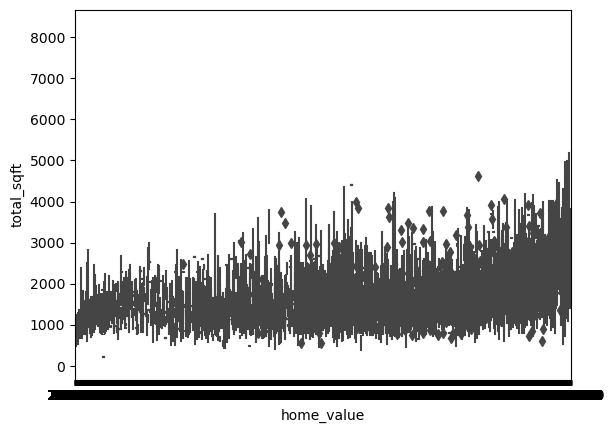

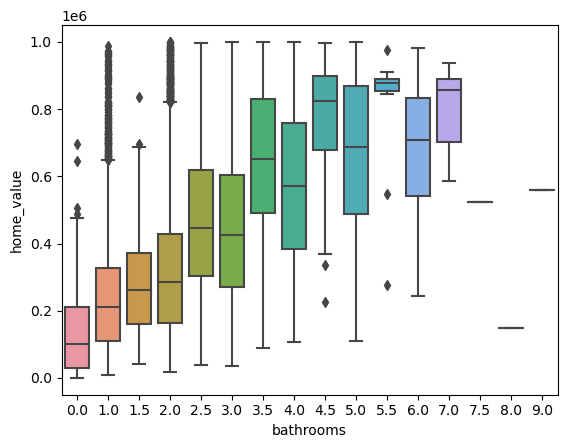

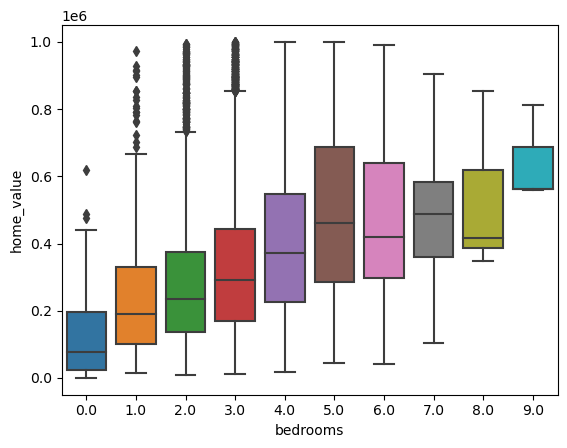

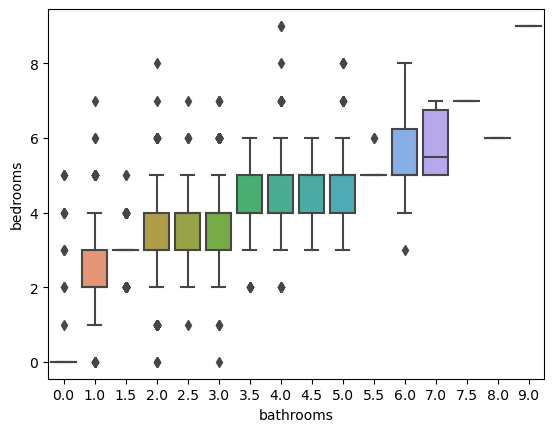

In [9]:
from wrangle import boxplots
boxplots(train)

> <b>Boxplot Takeaways<b/>
    > - Homes with higher square footage have higher home value.
    > - It appears the more bedrooms you have, the higher the home value, especially if you have eight bedrooms
    > - Homes with higher number of bathrooms seem to correlate with high home value.
    > - Bedrooms and Bathrooms appear to have a stairway/step correlation.

> <h3><b>Barplot Viz<b/>

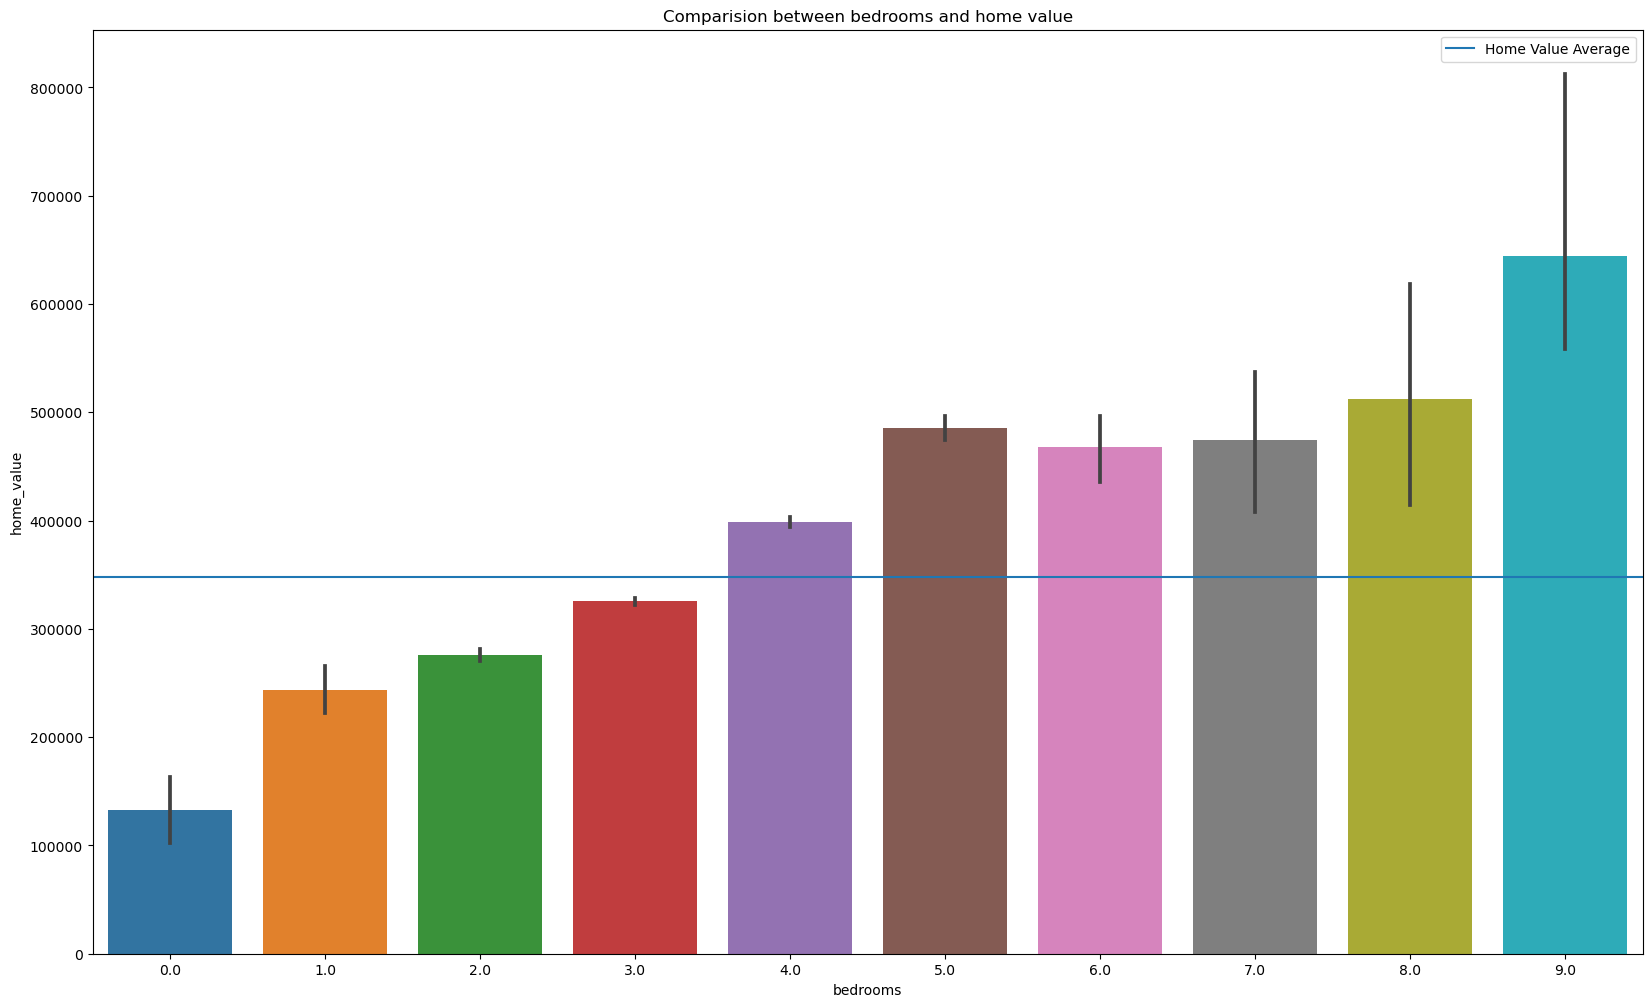

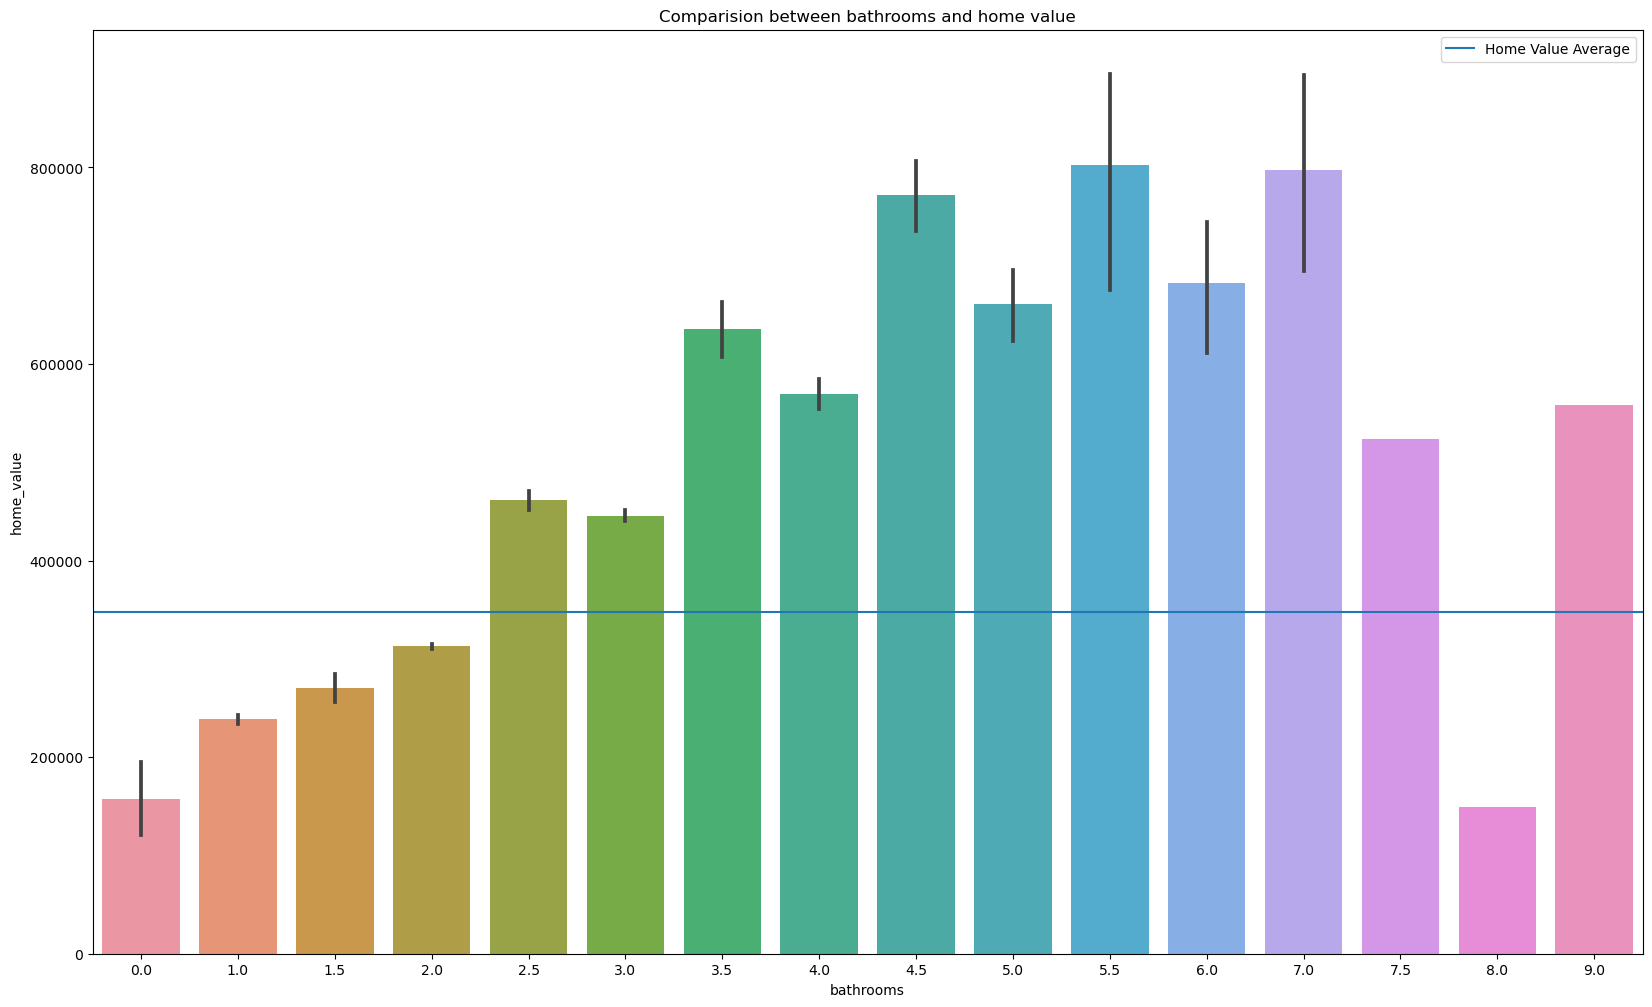

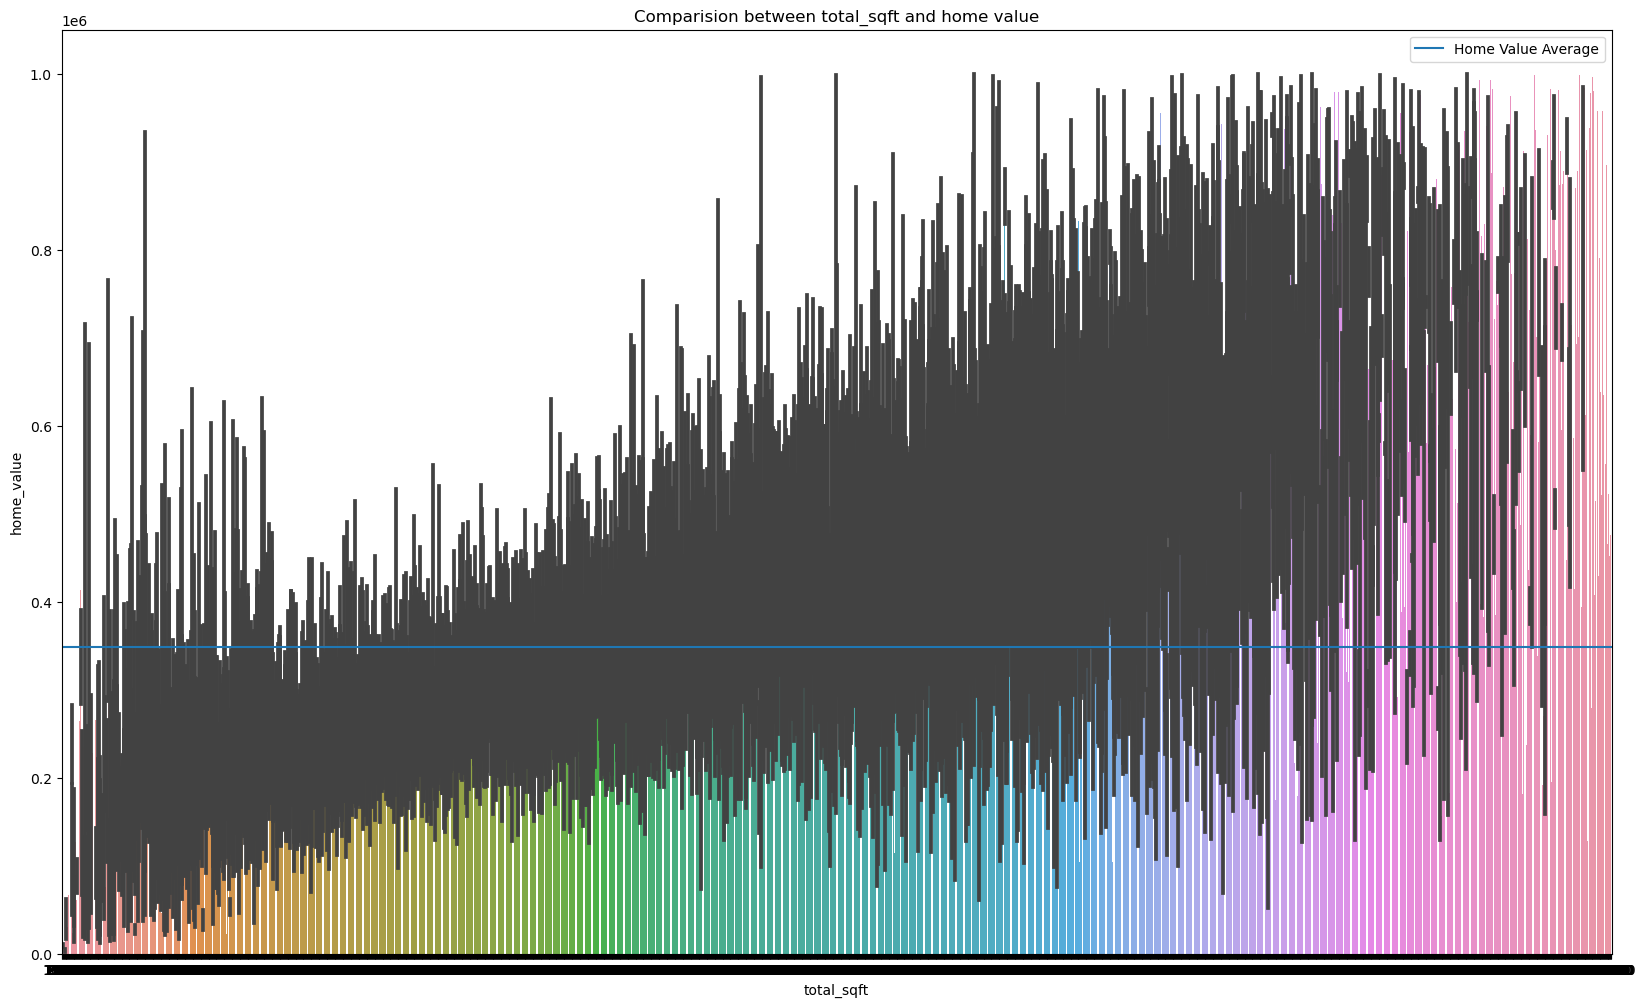

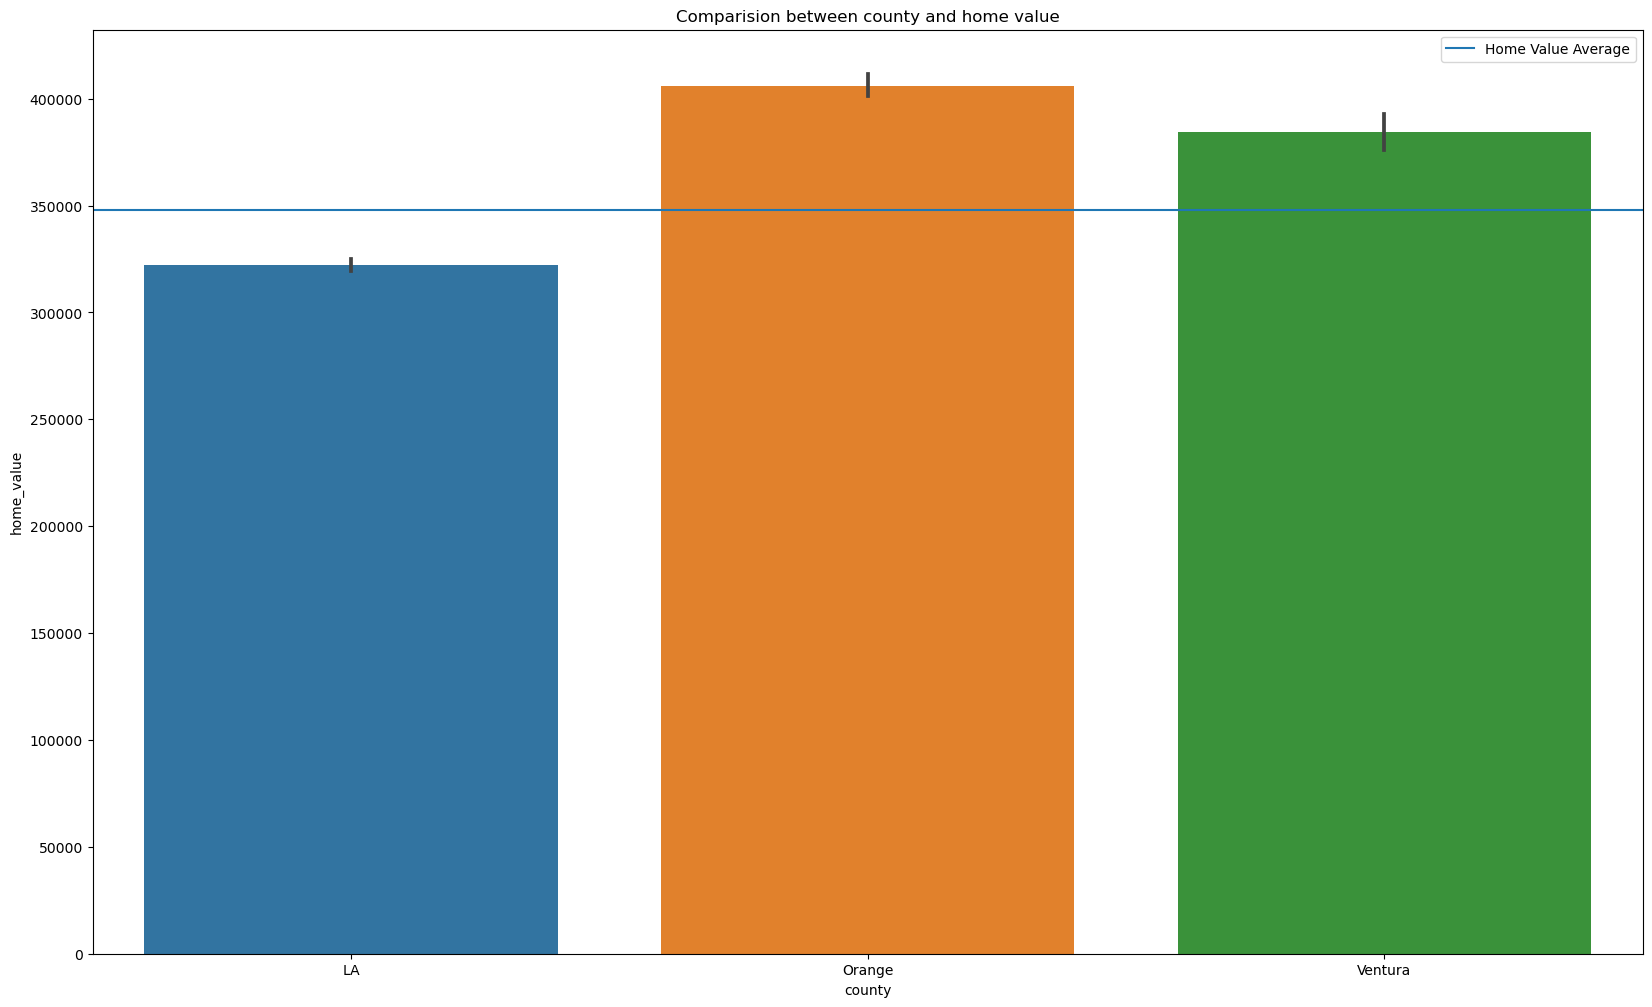

In [10]:
from wrangle import barplots
barplots(train)

> <b> Barplot takeaway:
           > - For every variable, the higher the number, the higher the home value (in general)
           > - Every variable could have an impact, the question is how big an impact?
    

<h2><b>Question 1: Does the variable 'Total Square Feet' have a defining relationship to 'Home Value?'<b/>

<Figure size 2000x1200 with 0 Axes>

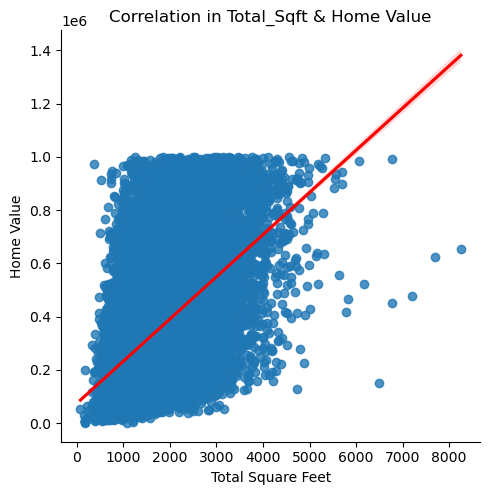

In [11]:
from wrangle import Correlation_Total_Sqft_Home_Value
Correlation_Total_Sqft_Home_Value(train)

<h2><b>Statistical test - T-Test<b/>

$H_0$: There is no relationship between 'Total_sqft' and 'home_value'

In [12]:
# set alpha
alpha = 0.05

In [13]:
from wrangle import eval_dist

In [14]:
r,p = stats.shapiro(train.total_sqft)
r,p

(0.9240468144416809, 0.0)

In [15]:
eval_dist(r,p)

The data is NOT normally distributed


In [16]:
r,p = stats.shapiro(train.home_value)
r,p

(0.9465257525444031, 0.0)

In [17]:
eval_dist(r,p)

The data is NOT normally distributed


In [18]:
r,p = stats.spearmanr(train.total_sqft, train.home_value)
r,p

(0.45206245943811885, 0.0)

In [19]:
from wrangle import eval_Spearmanresult
eval_Spearmanresult(r,p)

We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: 0.452062.
P-value: 0.0


<h4><b>
<div class="alert alert-success" role="alert">
  There is a strong relationship between 'total_sqft' and 'home_value'
</div>

<h2><b>Question 2: Are the number of bedrooms an indicator that can help predict the value of a home?<b/>

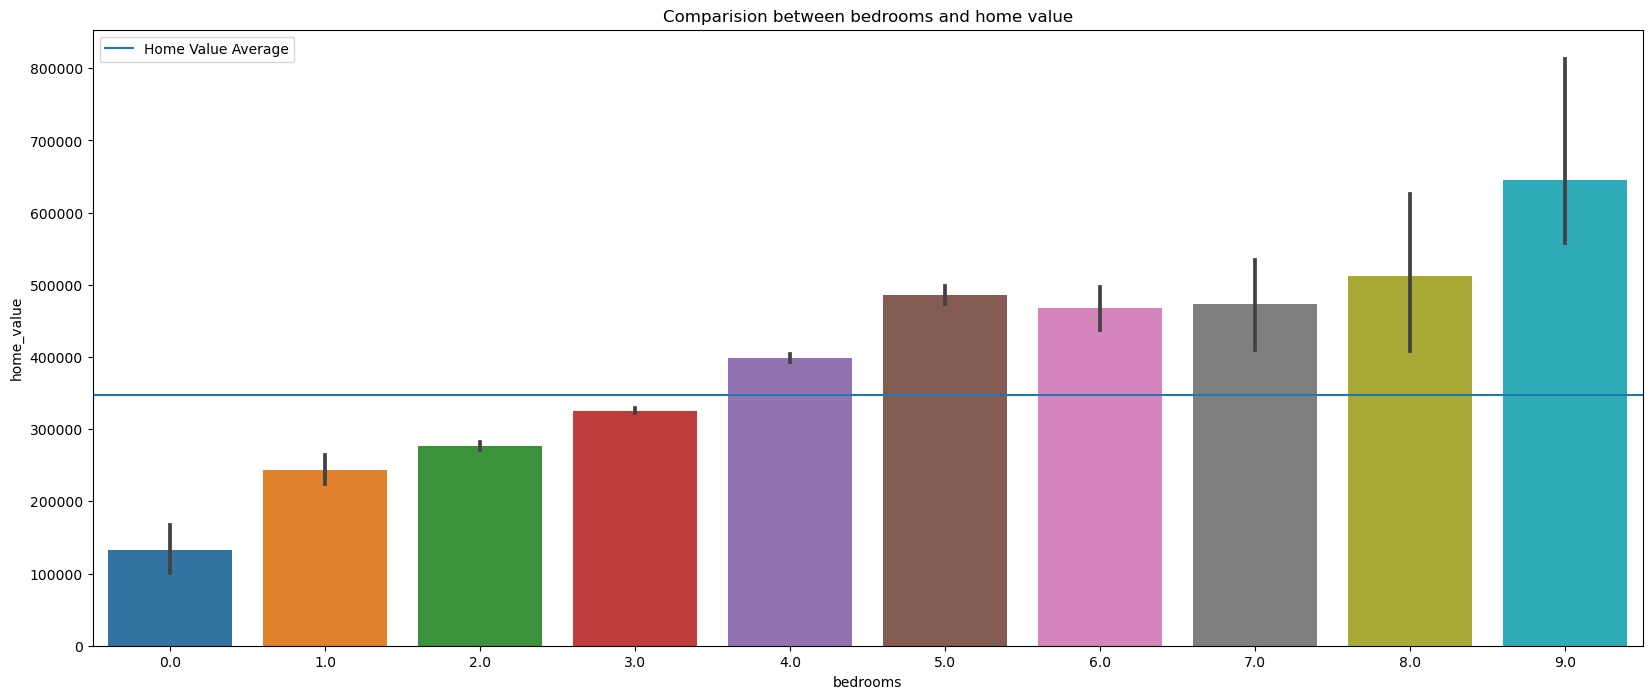

In [20]:
from wrangle import Predicting_Home_Value_via_Bedrooms
Predicting_Home_Value_via_Bedrooms(train)

<h2><b>Statistical test - T-Test<b/>

$H_0$: There is no relationship between 'bedrooms' and 'home_value'

In [21]:
# set alpha
alpha = 0.05

In [22]:
from wrangle import eval_dist

In [23]:
r,p = stats.shapiro(train.bedrooms)
r,p

(0.8853880167007446, 0.0)

In [24]:
eval_dist(r,p)

The data is NOT normally distributed


In [25]:
r,p = stats.shapiro(train.home_value)
r,p

(0.9465257525444031, 0.0)

In [26]:
eval_dist(r,p)

The data is NOT normally distributed


In [27]:
r,p = stats.spearmanr(train.bedrooms, train.home_value)
r,p

(0.25309243913143814, 0.0)

In [28]:
from wrangle import eval_Spearmanresult
eval_Spearmanresult(r,p)

We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: 0.253092.
P-value: 0.0


<h4><b>
<div class="alert alert-warning" role="alert">
  There is a weak relationship between 'bedrooms' and 'home_value'
</div>

<h2><b>Question 3: Are the number of bathrooms a strong or a weak factor in predicting a home's value?<b/>

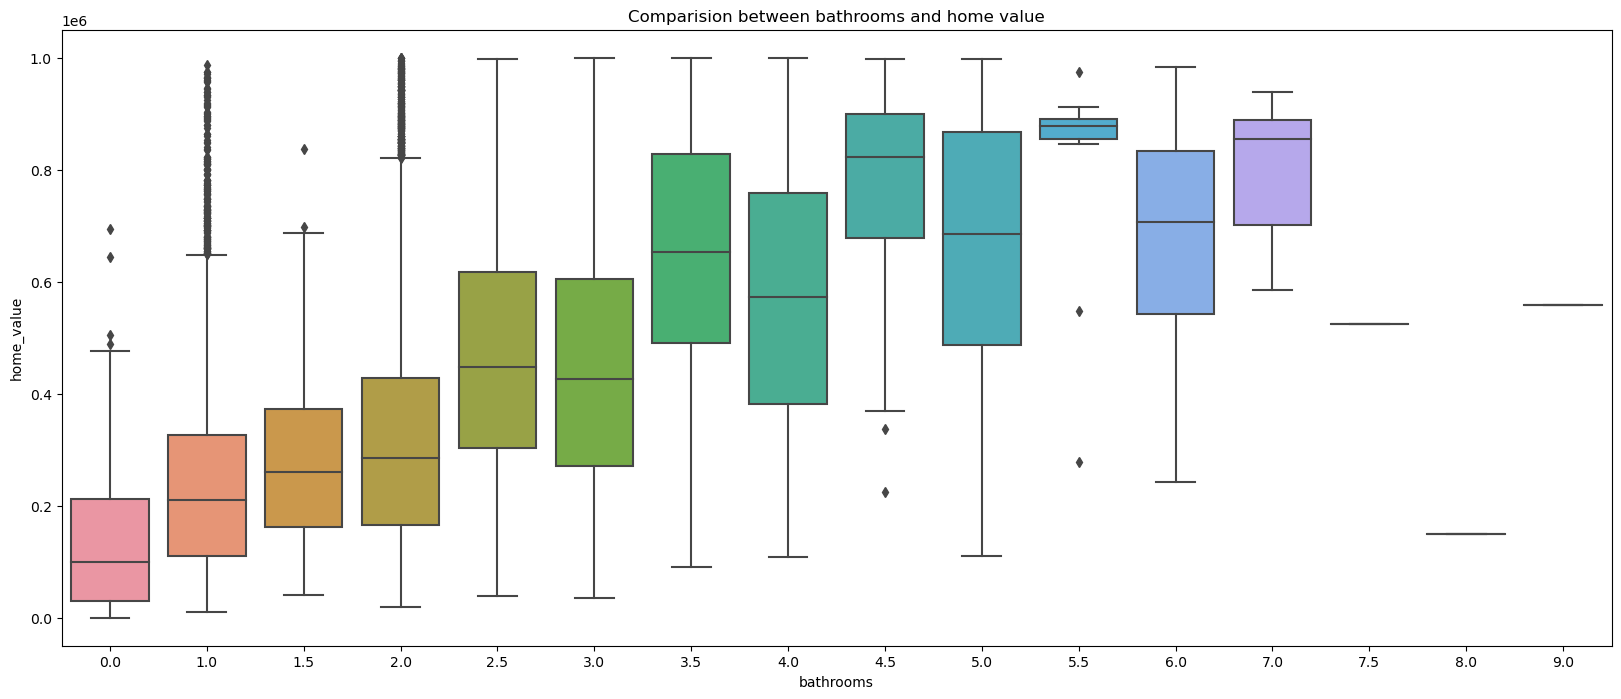

In [29]:
from wrangle import Predicting_Home_Value_via_Bathrooms
Predicting_Home_Value_via_Bathrooms(train)

<h2><b>Statistical test - T-Test<b/>

$H_0$: There is no relationship between 'bathrooms' and 'home_value'

In [30]:
# set alpha
alpha = 0.05

In [31]:
from wrangle import eval_dist

In [32]:
r,p = stats.shapiro(train.bathrooms)
r,p

(0.8767985701560974, 0.0)

In [33]:
eval_dist(r,p)

The data is NOT normally distributed


In [34]:
r,p = stats.shapiro(train.home_value)
r,p

(0.9465257525444031, 0.0)

In [35]:
eval_dist(r,p)

The data is NOT normally distributed


In [36]:
r,p = stats.spearmanr(train.bathrooms, train.home_value)
r,p

(0.40621705364091876, 0.0)

In [37]:
from wrangle import eval_Spearmanresult
eval_Spearmanresult(r,p)

We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: 0.406217.
P-value: 0.0


<h4><b>
<div class="alert alert-success" role="alert">
  There is a moderate to strong correlation between 'bathrooms' and 'home_value'
</div>

<h2><b>Question 4: Does the location of a home factor into the value of a home?<b/>

<h2><b>Visualization of the data answering the question<b/>

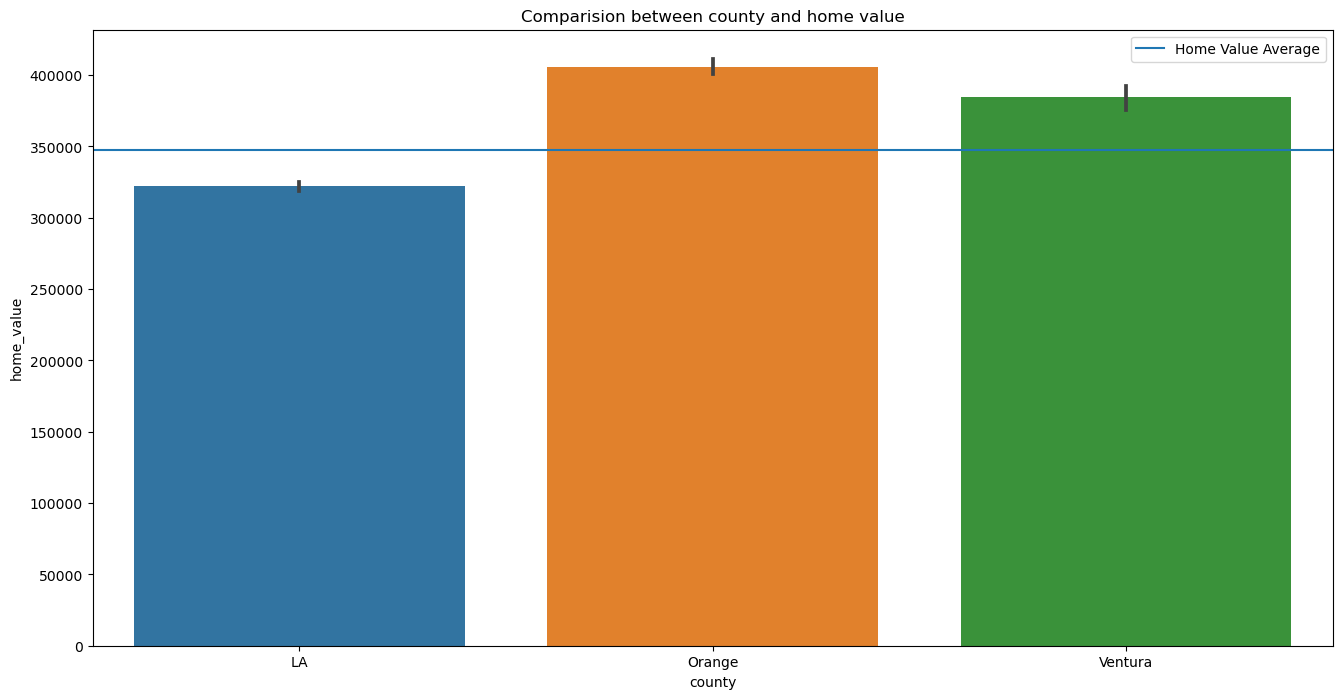

In [38]:
from wrangle import Predicting_Home_Value_per_County
Predicting_Home_Value_per_County(train)

<h4><b>
<div class="alert alert-success" role="alert">
The simple eye test shows that there is an obvious difference in home_value between the three counties featured in the data. No tests are required to input feature into models.
</div>

<h3>Scaling Numeric Data

In [39]:
from wrangle import scale_data, encode_data
train, validate, test = scale_data(train, validate, test)
train, validate, test = encode_data(train, validate, test)

In [40]:
#Let's split up the train data between X and y
from wrangle import XandY_train_validate_test
X_train_scaled, y_train_scaled, X_validate_scaled, y_validate_scaled, X_test_scaled, y_test_scaled = XandY_train_validate_test(train, validate, test)

<h3>Feature Engineering

> <b>Select K Best

In [41]:
from wrangle import select_Kbest
select_Kbest(X_train_scaled, y_train)

array(['Bathroom_Count_Scaled', 'Finished_sqft_Scaled'], dtype=object)

> <b>Recursive Feature Elimination

In [42]:
from wrangle import get_RFE
rfe_feature, k = get_RFE(X_train_scaled,y_train)
rfe_feature, k

(array(['Bathroom_Count_Scaled', 'Finished_sqft_Scaled'], dtype=object),
                 Variable  Rank
 2  Bathroom_Count_Scaled     1
 3   Finished_sqft_Scaled     1
 1   Bedroom_Count_Scaled     2
 0                 county     3)


<h2><b>Evaluating Regression Models

> > <h4><b>Establish the baseline

In [43]:
# X -> set of all ind features
#y -> dependent variable, target
X = X_train_scaled
y = y_train_scaled

In [44]:
from sklearn.linear_model import LinearRegression

#make
lm = LinearRegression()
#fit
lm.fit(X,y)
#use
yhat = lm.predict(X)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
baseline_med = y.median()
baseline_mean = y.mean()

In [47]:
y_pred = pd.DataFrame(
    {
    'y_act': y.values,
    'yhat' : yhat,
    'baseline_med': baseline_med,
    'baseline_mean': baseline_mean
    }, index=train.index)

In [48]:
# compute the error on these two baselines:
mean_baseline_rmse = mean_squared_error(y_pred.baseline_mean, y) ** (1/2)
med_baseline_rmse = mean_squared_error(y_pred.baseline_med, y) ** (1/2)

In [49]:
mean_baseline_rmse < med_baseline_rmse

True

In [51]:
#Establish the true baseline
baseline = mean_baseline_rmse
baseline

219813.86084096498

> <b>Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model.<b/>

In [52]:
# Squared Errors, 
# residuals squared
squared_errors = (y_pred['y_act'] - y_pred['yhat']) ** 2
# Sum of Squared Error, 
sse = squared_errors.sum()
# Mean Squared error, 
mse = sse / train.shape[0] #alternatively, len(train), y_pred.shape[0]
# Root mean Squared Error
# square root the mean squared error!
rmse = mse**0.5

In [53]:
# Squared Errors, 
# residuals squared
squared_errors_bl = (y_pred['y_act'] - y_pred['baseline_mean']) ** 2
# Sum of Squared Error, 
sse_bl = squared_errors_bl.sum()

sse, sse_bl

(1039743319460692.5, 1403158594453235.0)

<h3><b>Modeling

In [59]:
#Establish the true baseline
baseline_rmse = mean_baseline_rmse

In [60]:
from wrangle import evaluate_reg
evaluate_reg(y, yhat)

(189219.0088621176, 0.2589980038102204)

In [62]:
# make sure that we have a baseline guess
# that is the same shape as our y variable:
# np.repeat does what it sounds like
baseline_array = np.repeat(baseline_rmse, y.shape[0])

In [63]:
baseline_rsme, baseline_r2 = evaluate_reg(y, baseline_array)

> > <b>Create a dataframe to compare the models<b/>

In [64]:
eval_df = pd.DataFrame([{
    'model': 'baseline',
    'rmse': baseline_rmse,
    'r2': baseline_r2
}])

In [65]:
eval_df

,model,rmse,r2
0,baseline,219813.860841,-0.339371


> <b>------------------------------Ordinary Least Squares (OLS)------------------------------

<h4>Import RFE

In [66]:
from sklearn.feature_selection import RFE

<h4>Create, Fit, & Use RFE

In [67]:
# first ML model
lr1 = LinearRegression()

# create the thing
rfe = RFE(lr1, n_features_to_select = 2)

# fit the thing
rfe.fit(X, y)

# use it/transform your X_train & validate data splits
X_train_rfe = rfe.transform(X)

X_val_rfe = rfe.transform(validate.drop(columns = ['home_value']))

<h4>What features got selected for predicting Home Value??

In [69]:
rfe.get_feature_names_out()

array(['Bathroom_Count_Scaled', 'Finished_sqft_Scaled'], dtype=object)

In [70]:
#Creating a X and y for validate and test
X_val, y_val = validate.drop(columns=['home_value']), validate['home_value']
X_test, y_test = test.drop(columns=['home_value']), test['home_value']

In [71]:
lr1

LinearRegression()

In [72]:
lr1.fit(X_train_rfe, y)

LinearRegression()

In [73]:
y_pred_val = lr1.predict(X_val_rfe)

In [74]:
evaluate_reg(y, lr1.predict(X_train_rfe))

(190716.9173896254, 0.24721962530958752)

In [75]:
rmse, r_2 = evaluate_reg(y, lr1.predict(X_train_rfe))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'model': 'ordinary_least_squares',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)

In [76]:
eval_df

,model,rmse,r2
0,baseline,219813.860841,-0.339371
1,ordinary_least_squares,190716.917390,0.247220


In [80]:
val_rmse, val_r2 = evaluate_reg(y_val, lr1.predict(X_val_rfe))
val_dict = {
    'model': 'ols_rfe_1',
    'val_rmse': val_rmse,
    'val_r2': val_r2
}

In [81]:
val_scores = [val_dict]
val_scores

[{'model': 'ols_rfe_1',
  'val_rmse': 189180.62567043433,
  'val_r2': 0.23878504776253295}]

> <b>------------------------------LassoLars------------------------------
<b/>

In [82]:
from sklearn.linear_model import LassoLars

In [83]:
#Make the thing
lasso = LassoLars(alpha=1)

#Fit the thing
lasso = lasso.fit(X, y)

In [84]:
rmse, r_2 = evaluate_reg(y, lasso.predict(X))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'model': 'LassoLars',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)

In [85]:
val_rmse, val_r2 = evaluate_reg(y_val, lasso.predict(X_val))
val_dict = {
    'model': 'LassoLars',
    'val_rmse': val_rmse,
    'val_r2': val_r2
}

In [86]:
val_scores.append(val_dict)

In [87]:
eval_df

,model,rmse,r2
0,baseline,219813.860841,-0.339371
1,ordinary_least_squares,190716.917390,0.247220
2,LassoLars,189219.010777,0.258998


> <b>------------------------------Polynomial Regression------------------------------

In [88]:
from sklearn.preprocessing import PolynomialFeatures

In [89]:
#Make the thing
pf = PolynomialFeatures(degree=2)

#fit the thing and USE it on train
x_train_sq = pf.fit_transform(X)

#Use the thing on Val and Test
x_val_sq = pf.transform(X_val)
x_test_sq = pf.transform(X_test)

In [90]:
# Make a new model for our polynomial regressor:

plyreg = LinearRegression()
plyreg.fit(x_train_sq, y)

LinearRegression()

In [91]:
#Evaluate

rmse, r_2 = evaluate_reg(y, plyreg.predict(x_train_sq))
eval_df = pd.concat([eval_df, pd.DataFrame(
[{
    'model': 'Polynomial Regression',
    'rmse': rmse,
    'r2': r_2
}

]
)], ignore_index=True, axis=0 )

In [92]:
val_rmse, val_r2 = evaluate_reg(y_val, plyreg.predict(x_val_sq))
val_dict = {
    'model': 'Polynomial Regression',
    'rmse': val_rmse,
    'r2': val_r2
}

In [93]:
val_scores.append(val_dict)

In [94]:
eval_df

,model,rmse,r2
0,baseline,219813.860841,-0.339371
1,ordinary_least_squares,190716.917390,0.247220
2,LassoLars,189219.010777,0.258998
3,Polynomial Regression,188029.664402,0.268284


In [95]:
eval_df.loc[eval_df.rmse == eval_df.rmse.min()]

,model,rmse,r2
3,Polynomial Regression,188029.664402,0.268284


<h2><b>Evaluate the final model on the Test data

> <h4><b>The model I selected was 'Polynomial Regression'

In [ ]:
test_rmse, test_r2 = evaluate_reg(y_test, plyreg.predict(x_test_sq))
val_dict = {
    'model': 'Polynomial Regression',
    'rmse': test_rmse,
    'r2': test_r2
}

In [ ]:
val_scores.append(val_dict)

In [ ]:
eval_df

In [ ]:
val_dict